<a href="https://colab.research.google.com/github/CharlesArnal/Deep_Atlas/blob/main/CreatingDatasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create datasets


In [ ]:
#%load_ext tensorboard
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import datetime
from copy import deepcopy
import math
import pickle
import scipy.io as sio
import sklearn.datasets
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.svm import LinearSVC
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import iqr
from sklearn.utils import check_random_state

tfk = tf.keras
tfkl = tf.keras.layers
tfpl = tfp.layers
tfd = tfp.distributions

# Mount Google Drive
from google.colab import drive, files
import sys
drive.mount('/content/drive', force_remount = True)

sys.path.append('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder')
from PCAE import PCAE, Chart, Gating_network




Mounted at /content/drive


## Sphere (uniform)

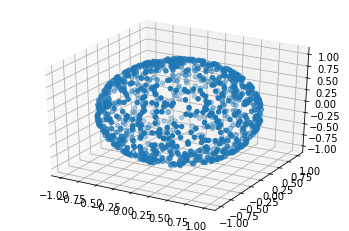

In [ ]:
noise = 0.0

# Generate the data
uniform_sphere_training_data = []
uniform_sphere_test_data = []
for i in range(1000):
  x = np.random.multivariate_normal([0,0,0],[[1,0,0],[0,1,0],[0,0,1]])
  x = x/np.linalg.norm(x)
  x += np.random.multivariate_normal([0,0,0],noise*np.array([[1.0,0,0],[0,1,0],[0,0,1]]))
  uniform_sphere_training_data.append(x)

for i in range(3000):
  x = np.random.multivariate_normal([0,0,0],[[1,0,0],[0,1,0],[0,0,1]])
  x = x/np.linalg.norm(x)
  x += np.random.multivariate_normal([0,0,0],noise*np.array([[1.0,0,0],[0,1,0],[0,0,1]]))
  uniform_sphere_test_data.append(x)

uniform_sphere_training_data = np.array(uniform_sphere_training_data)
uniform_sphere_test_data = np.array(uniform_sphere_test_data)

# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/uniform_sphere_data',\
         training_data = uniform_sphere_training_data, test_data = uniform_sphere_test_data)

# Plot the training data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(uniform_sphere_training_data[:,0], uniform_sphere_training_data[:,1], uniform_sphere_training_data[:,2])
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')




## Sphere (grid)


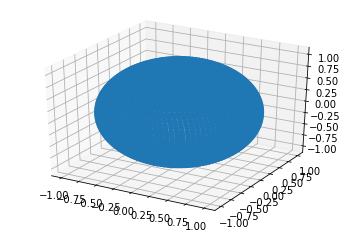

In [ ]:
# Not meant to be used for actual experiments
noise = 0.0

# Generate the data
x_grid=[]
y_grid=[]
z_grid=[]
N= 50
for j in np.linspace(0.0, np.pi, num=N):
  for i in np.linspace(0.0, 2*np.pi, num=round(1+N*(np.sin(j) +1))):
    x_grid.append(np.sin(j) * np.cos(i))
    y_grid.append(np.sin(j) * np.sin(i))
    z_grid.append(np.cos(j))


grid_sphere_training_data =  np.array([x_grid, y_grid, z_grid]).T
grid_sphere_test_data = np.array([x_grid, y_grid, z_grid]).T


# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/grid_sphere_data',\
         training_data = grid_sphere_training_data, test_data = grid_sphere_test_data)

# Plot the training data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(grid_sphere_training_data[:,0], grid_sphere_training_data[:,1], grid_sphere_training_data[:,2])
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')


## Swiss roll


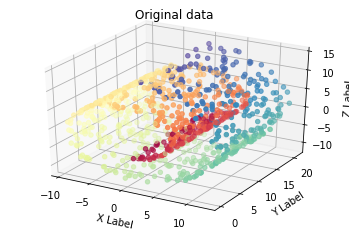

In [ ]:
noise = 0.0
(swiss_roll_training_data,color_training) = sklearn.datasets.make_swiss_roll(n_samples = 1000, noise = noise)
(swiss_roll_test_data,color_test) = sklearn.datasets.make_swiss_roll(n_samples = 3000, noise = noise)


# Needed to modify the way figure behaves
Axes3D

# Plot dataset

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(swiss_roll_training_data[:, 0], swiss_roll_training_data[:, 1], swiss_roll_training_data[:, 2], c=color_training, cmap=plt.cm.Spectral)
ax.set_title("Original data")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')



# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/swiss_roll_data',\
         training_data = swiss_roll_training_data, test_data = swiss_roll_test_data)



## Pierced swiss roll

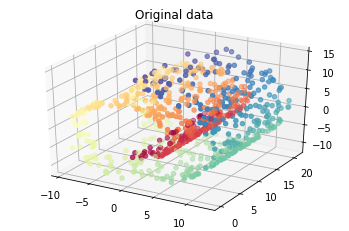

In [ ]:
noise = 0.0
(swiss_roll_training_data,color_training) = sklearn.datasets.make_swiss_roll(n_samples = 1000, noise = noise)
(swiss_roll_test_data,color_test) = sklearn.datasets.make_swiss_roll(n_samples = 1000, noise = noise)

pierced_swiss_roll_training_data = []
pierced_swiss_roll_test_data = []
pierced_color_training = []
for index, x in enumerate(swiss_roll_training_data):
  if not (x[0]<-5 and 5<x[1]<15):
    pierced_swiss_roll_training_data.append(x)
    pierced_color_training.append(color_training[index])
for x in swiss_roll_test_data:
  if not (x[0]<-5 and 4<x[1]<6):
    pierced_swiss_roll_test_data.append(x)

pierced_swiss_roll_test_data = np.array(pierced_swiss_roll_test_data)    
pierced_swiss_roll_training_data = np.array(pierced_swiss_roll_training_data)

# Needed to modify the way figure behaves
Axes3D

# Plot dataset

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pierced_swiss_roll_training_data[:, 0], pierced_swiss_roll_training_data[:, 1], pierced_swiss_roll_training_data[:, 2], c=pierced_color_training, cmap=plt.cm.Spectral)
ax.set_title("Original data")



# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/pierced_swiss_roll_data',\
         training_data = pierced_swiss_roll_training_data, test_data = pierced_swiss_roll_test_data)


## Torus

(1000, 3)


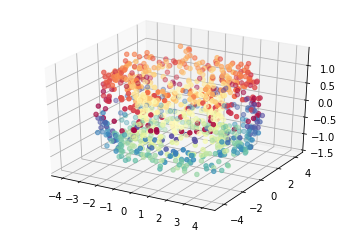

In [ ]:
noise = 0.025

torus_training_data = []
torus_test_data = []
color_training = []

# Create the torus
N = 2000
for i in range(N):
  p = np.random.uniform() * (2 * np.pi )
  t = np.random.uniform() * (2 * np.pi )
  x = [(np.cos(t) + 3)  * np.cos(p), \
      (np.cos(t) + 3)* np.sin(p), \
      np.sin(t)] +\
      np.random.multivariate_normal([0,0,0],noise*np.array([[1.0,0,0],[0,1,0],[0,0,1]]))
  if i<N/2:
    torus_training_data.append(x)
    color_training.append(t)
  else:
    torus_test_data.append(x)

torus_training_data = np.array(torus_training_data)
torus_test_data = np.array(torus_test_data)
# Needed to modify the way figure behaves
Axes3D


print(np.shape(torus_training_data))
# Plot dataset 
# TODO: problem with the color
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(torus_training_data[:,0], torus_training_data[:,1], torus_training_data[:,2],c=color_training, cmap=plt.cm.Spectral)



# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/torus_data',\
         training_data = torus_training_data, test_data = torus_test_data)



    

## Klein bottle


(1000, 4)


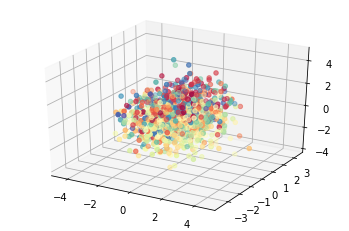

In [ ]:
noise = 0.0

Klein_bottle_training_data = []
Klein_bottle_test_data = []
color_training = []

R=1
P=1
epsilon = 0.5
# Create the Klein bottle
N = 2000
for i in range(N):
  p = np.random.uniform() * (2 * np.pi )
  t = np.random.uniform() * (2 * np.pi )
  x = [R*(np.cos(t/2)* np.cos(p) - np.sin(t/2)*np.sin(2*p)), \
      R*(np.sin(t/2)* np.cos(p) + np.cos(t/2)*np.sin(2*p)), \
      P*np.cos(t)*(1+epsilon*np.sin(p)),\
      P*np.sin(t)*(1+epsilon*np.sin(p))]  +\
      np.random.multivariate_normal(np.zeros(4),np.identity(4))
  if i<N/2:
    Klein_bottle_training_data.append(x)
    color_training.append(t)
  else:
    Klein_bottle_test_data.append(x)

Klein_bottle_training_data = np.array(Klein_bottle_training_data)
Klein_bottle_test_data = np.array(Klein_bottle_test_data)
# Needed to modify the way figure behaves
Axes3D


print(np.shape(Klein_bottle_training_data))
# Plot dataset 
# TODO: problem with the color
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Klein_bottle_training_data[:,0], Klein_bottle_training_data[:,1], Klein_bottle_training_data[:,2],c=color_training, cmap=plt.cm.Spectral)



# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/Klein_bottle_data',\
         training_data = Klein_bottle_training_data, test_data = Klein_bottle_test_data)



    

## Concentric circles

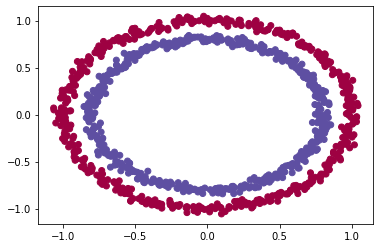

In [ ]:
noise = 0.025
n_samples = 1000
(conc_circles_training_data,color_training) = sklearn.datasets.make_circles(n_samples=n_samples,  shuffle=True, noise=noise, random_state=None, factor=0.8)
(conc_circles_test_data,color_test) = sklearn.datasets.make_circles(n_samples=3*n_samples,  shuffle=True, noise=noise, random_state=None, factor=0.8)

# Needed to modify the way figure behaves
Axes3D

# Plot dataset

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(conc_circles_training_data[:, 0], conc_circles_training_data[:, 1], c= color_training, cmap=plt.cm.Spectral)




# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/conc_circles_data',\
         training_data = conc_circles_training_data, test_data = conc_circles_test_data)



## Higher dimensional sphere

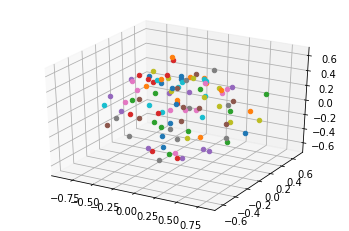

In [ ]:
noise = 0.0
dim = 10
n_samples = 200

# Generate the data
uniform_sphere_training_data = []
uniform_sphere_test_data = []
for i in range(n_samples):
  x = np.random.multivariate_normal(np.zeros(dim),np.identity(dim))
  x = x/np.linalg.norm(x)
  x += np.random.multivariate_normal(np.zeros(dim),noise*np.identity(dim))
  if i<n_samples/2:
    uniform_sphere_training_data.append(x)
  else:
    uniform_sphere_test_data.append(x)

uniform_sphere_test_data = np.array(uniform_sphere_test_data)
uniform_sphere_training_data = np.array(uniform_sphere_training_data)

# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/uniform_sphere_dim_'+str(dim)+'_data',\
         training_data = uniform_sphere_training_data, test_data = uniform_sphere_test_data)

# Plot the training data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for x in uniform_sphere_training_data:
  ax.scatter(x[0], x[1], x[2])
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')




## Gaussian manifold


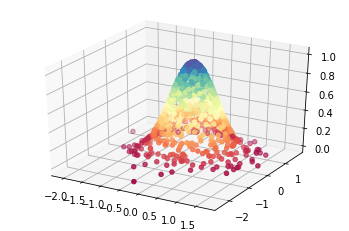

In [ ]:
from matplotlib import cm

noise = 0.0
n_samples = 2000
c = 0.3

# Generate the data
Gaussian_manifold_training_data = []
Gaussian_manifold_test_data = []
for i in range(n_samples):
  x = np.random.multivariate_normal(np.zeros(2),c*np.identity(2))
  z = np.exp(-0.5/c*np.inner(x, x))

  x = np.concatenate((x,[z]))
  x += np.random.multivariate_normal(np.zeros(3),noise*np.identity(3))
  if i<n_samples/2:
    Gaussian_manifold_training_data.append(x)
  else:
    Gaussian_manifold_test_data.append(x)

Gaussian_manifold_training_data = np.array(Gaussian_manifold_training_data)
Gaussian_manifold_test_data = np.array(Gaussian_manifold_test_data)

# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/Gaussian_manifold_data',\
         training_data = Gaussian_manifold_training_data, test_data = Gaussian_manifold_test_data)

# Plot the training data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
a x.scatter(Gaussian_manifold_training_data[:,0], Gaussian_manifold_training_data[:,1], Gaussian_manifold_training_data[:,2], c = Gaussian_manifold_training_data[:,2], cmap=plt.cm.Spectral)

  
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')



## dumb dataset

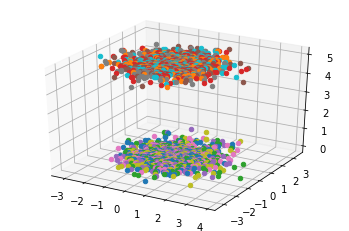

In [ ]:

# Generate the data
dumb_training_data = []
dumb_test_data = []
for i in range(2000):
  x = np.concatenate((np.random.multivariate_normal([0,0],[[1,0],[0,1.]]),[0]))
  x2 = np.concatenate((np.random.multivariate_normal([0,0],[[1,0],[0,1.]]),[5]))
  if i<1000:
    dumb_training_data.append(x)
    dumb_training_data.append(x2)
  else:
    dumb_test_data.append(x)
    dumb_test_data.append(x2)

dumb_training_data = np.array(dumb_training_data)
dumb_test_data = np.array(dumb_test_data)
# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/dumb_data',\
         training_data = dumb_training_data, test_data =dumb_test_data)

# Plot the training data
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
for x in dumb_training_data:
  ax.scatter(x[0], x[1],x[2])


## V lines



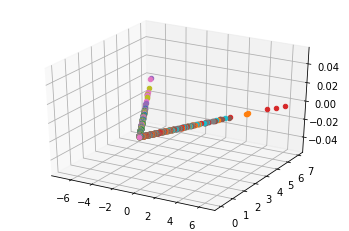

In [ ]:

# Generate the data
v_training_data = []
v_test_data = []
for i in range(1000):
  x = np.concatenate((np.random.exponential()*np.array([-1,1]),[0]))
  x2 = np.concatenate((np.random.exponential()*np.array([1,1]),[0]))
  if i<500:
    v_training_data.append(x)
    v_training_data.append(x2)
  else:
    v_test_data.append(x)
    v_test_data.append(x2)

v_training_data = np.array(v_training_data)
v_test_data = np.array(v_test_data)
# Save the data
np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/v_data',\
         training_data = v_training_data, test_data =v_test_data)

# Plot the training data
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
for x in v_training_data:
  ax.scatter(x[0], x[1])


## MNIST


In [ ]:

dataset_name = "mnist"
x_train, x_test = tfds.load("mnist", 
                            split=['train', 'test'], 
                            shuffle_files=True,
                            batch_size=-1, as_supervised = True) # i know this looks weird, but we need it

points_train = np.reshape(x_train[0].numpy().astype("float32"), [np.shape(x_train[0].numpy())[0],784])
labels_train = x_train[1].numpy()
points_test = np.reshape(x_test[0].numpy().astype("float32") , [np.shape(x_test[0].numpy())[0],784])
labels_test = x_test[1].numpy()


np.savez('/content/drive/MyDrive/Productions mathématiques/GeoDiffEncoder/Datasets/MNIST_data',\
         training_data = points_train, test_data = points_test, training_labels = labels_train, test_labels = labels_test)


In [ ]:
sio.savemat("MNIST_labels.mat",{"training_labels":labels_train, "test_labels":labels_test})
files.download("MNIST_labels.mat")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(labels_train)

[4 1 0 ... 6 1 5]
